In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [18]:
train_dir = "/kaggle/input/fruit-recognition/train/train"
test_dir = "/kaggle/input/fruit-recognition/test/test"

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix , classification_report 

import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D

In [31]:
IMG_HEIGHT = 100
IMG_WIDTH = 100
BATCH_SIZE = 64
EPOCHS = 5
CLASS_LABELS  = ["Apple Braeburn"]
NUM_CLASSES = 33

# Data generators

In [45]:
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.05,
                                   rescale=1./255,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Train, validation, and test generators

In [46]:
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True,
    color_mode="rgb",
    class_mode="categorical",
    subset="training"
)

validation_generator = test_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True,
    color_mode="rgb",
    class_mode="categorical",
    subset="validation"
)
test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=False,
    color_mode="rgb",
    class_mode="categorical"
)


Found 13493 images belonging to 33 classes.
Found 3361 images belonging to 33 classes.
Found 0 images belonging to 0 classes.


# Build Model ANN

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(100, 100,3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(33, activation='softmax')
])

# Adam(learning_rate=0.001)
# encoding y : datagenerator : encode y

In [34]:
model.compile(
    optimizer=  Adam() ,  # 'adam'
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [35]:
history = model.fit(
    x=train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

Epoch 1/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 61s 277ms/step - accuracy: 0.0807 - loss: 6.2882 - val_accuracy: 0.1889 - val_loss: 2.8337
Epoch 2/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 60s 275ms/step - accuracy: 0.1854 - loss: 2.7606 - val_accuracy: 0.1895 - val_loss: 2.4607
Epoch 3/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 60s 276ms/step - accuracy: 0.2090 - loss: 2.4105 - val_accuracy: 0.2267 - val_loss: 2.2294
Epoch 4/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 62s 284ms/step - accuracy: 0.2445 - loss: 2.2152 - val_accuracy: 0.3270 - val_loss: 2.0824
Epoch 5/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 61s 280ms/step - accuracy: 0.2824 - loss: 2.0771 - val_accuracy: 0.2919 - val_loss: 1.8821


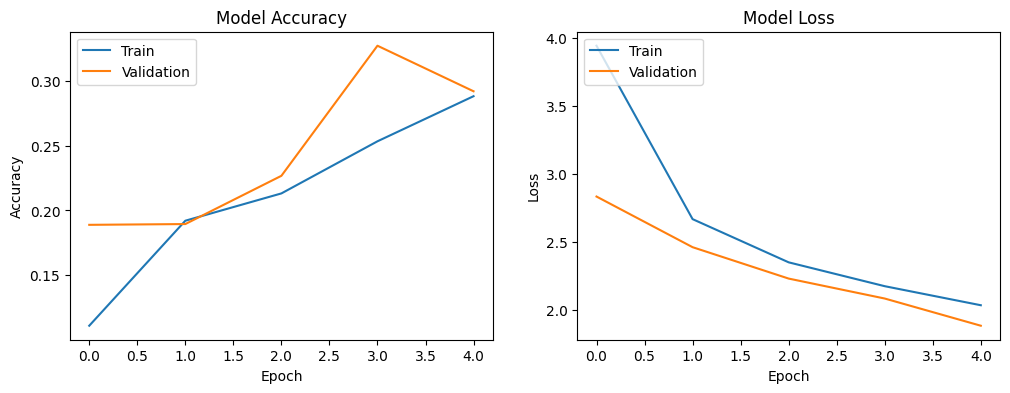

In [36]:
import matplotlib.pyplot as plt

# Plot accuracy and loss graphs
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.show()


# Plot the training history
plot_training_history(history)

# Build Mosel CNN

In [40]:
model = Sequential()

# First convolutional block
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPool2D(pool_size=2, strides=2))

# Second convolutional block
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.25))  ## drop 25% neurons (stop)

# Third convolutional block
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.25))

# Fourth convolutional block
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=32, activation='relu'))

# Output layer
model.add(Dense(33, activation='softmax'))

In [41]:
model.compile(
    optimizer=  Adam() , # Adam(learning_rate=0.001), # 'adam'
    loss='categorical_crossentropy',  # encoding y : datagenerator : encode y
    metrics=['accuracy']
)

# Train the model

In [42]:
history = model.fit(
    x=train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

Epoch 1/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 429s 2s/step - accuracy: 0.0674 - loss: 3.2343 - val_accuracy: 0.5210 - val_loss: 1.5918
Epoch 2/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 440s 2s/step - accuracy: 0.4386 - loss: 1.5739 - val_accuracy: 0.7754 - val_loss: 0.6309
Epoch 3/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 441s 2s/step - accuracy: 0.6821 - loss: 0.8702 - val_accuracy: 0.9351 - val_loss: 0.2691
Epoch 4/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 442s 2s/step - accuracy: 0.7745 - loss: 0.6172 - val_accuracy: 0.9890 - val_loss: 0.1414
Epoch 5/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 425s 2s/step - accuracy: 0.8390 - loss: 0.4820 - val_accuracy: 0.9833 - val_loss: 0.0908


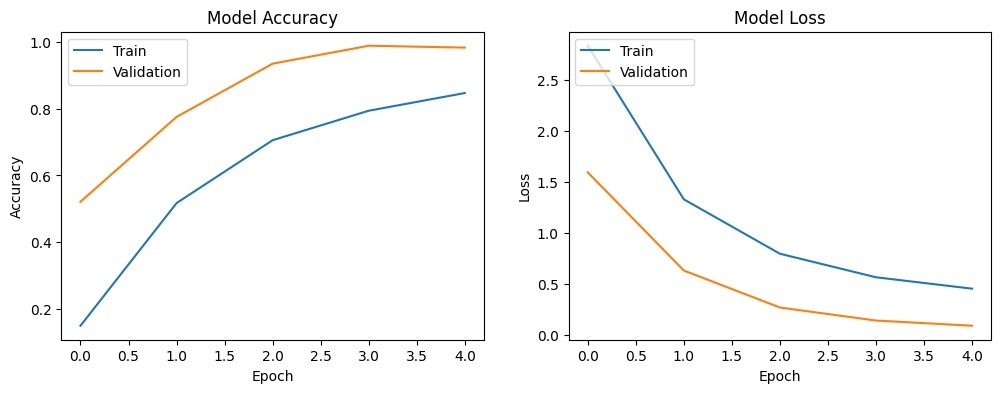

In [43]:
import matplotlib.pyplot as plt

# Plot accuracy and loss graphs
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.show()


# Plot the training history
plot_training_history(history)